In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
player=pd.read_csv('players_20.csv')

In [3]:
player

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


In [4]:
feature=['overall','age','potential','value_eur','wage_eur']
player=player.dropna(subset=feature)
data=player[feature].copy()

In [5]:
data


,overall,age,potential,value_eur,wage_eur
0,94,32,94,95500000,565000
1,93,34,93,58500000,405000
2,92,27,92,105500000,290000
3,91,26,93,77500000,125000
4,91,28,91,90000000,470000
...,...,...,...,...,...
18273,48,22,56,40000,2000
18274,48,22,56,40000,2000
18275,48,19,56,40000,1000
18276,48,18,54,40000,1000


In [6]:
data=(data-data.min())/(data.max()-data.min())*9+1
data.head()

,overall,age,potential,value_eur,wage_eur
0,10.000000,6.538462,9.804348,9.146919,10.000000
1,9.804348,7.230769,9.608696,5.990521,7.451327
2,9.608696,4.807692,9.413043,10.000000,5.619469
3,9.413043,4.461538,9.608696,7.611374,2.991150
4,9.413043,5.153846,9.217391,8.677725,8.486726


In [7]:
def random_centroid(data,k):
    
   centroids=[]
   for i in range(k):
       centroid=data.apply(lambda x: float(x.sample()))
       centroids.append(centroid)
   return pd.concat(centroids,axis=1)

In [8]:
centroids=random_centroid(data,3)

C:\Users\visha\AppData\Local\Temp\ipykernel_21264\2574282476.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid=data.apply(lambda x: float(x.sample()))


In [9]:
centroids


,0,1,2
overall,3.739130,5.500000,5.108696
age,5.500000,3.423077,7.923077
potential,5.500000,5.108696,4.326087
value_eur,1.055450,1.055450,1.063981
wage_eur,1.031858,1.047788,1.095575


In [10]:
#np.sqrt(((data-centroids.iloc[:,2])**2).sum(axis=1))     #as 0 given is used for first columns
def get_label(data,centroids):
    
     distances=centroids.apply(lambda x: np.sqrt(((data-x)**2).sum(axis=1)))
     return distances.idxmin(axis=1)
#distances.value_counts()



In [11]:
label=get_label(data,centroids)

In [12]:
label.value_counts()

1    11198
0     5070
2     2010
Name: count, dtype: int64

In [13]:
#reposition of new centroids
def new_centroid(data,label,k):
    
      return data.groupby(label).apply(lambda x: np.exp(np.log(x).mean())).T

In [14]:
from sklearn.decomposition import PCA   #we can visualise the number of dimension we want
from IPython.display import clear_output

In [15]:
def plot_cluster(data,centroids,label,iterations):
    pca=PCA(n_components=5)
    data_2D=pca.fit_transform(data)
    centroid_2D=pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f"iteration {iterations}")
    plt.scatter(x=data_2D[:,0],y=data_2D[:,1],c=label)
    plt.scatter(x=centroid_2D[:,0],y=centroid_2D[:,1],c='red')
    plt.show()
    

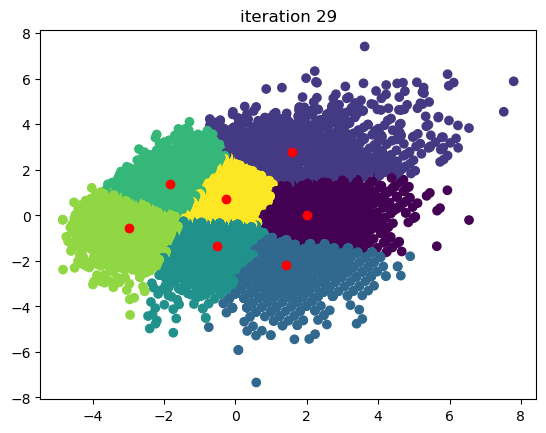

In [16]:
max_iteration=100
k=7
centroids=random_centroid(data,k)
old_centroids=pd.DataFrame()
iterations=1
while iterations<max_iteration and not centroids.equals(old_centroids):
    old_centroids=centroids
    label=get_label(data,centroids)
    centroids=new_centroid(data,label,k)
    plot_cluster(data,centroids,label,iterations)
    iterations +=1
